<a href="https://colab.research.google.com/github/EMAT31530/ai-group-project-music-classification/blob/master/Updated_Genetic_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use("seaborn")
np.random.seed(42)

In [130]:
songs = [0, 1, 2, 3, 4]

adjacency_mat = np.asarray(
    [
        [0.00, 28.02, 17.12, 27.46, 46.07],
        [28.02, 0.00, 34.00, 25.55, 25.55],
        [17.12, 34.00, 0.00, 18.03, 57.38],
        [27.46, 25.55, 18.03, 0.00, 51.11],
        [46.07, 25.55, 57.38, 51.11, 0.00],
    ]
)

In [131]:
class Population():   #Used to store information about a generation
    def __init__(self, bag, adjacency_mat):
        self.bag = bag #Full population
        self.parents = [] #CHosen superior routes
        self.score = 0  #Shortest Distance in population
        self.best = None  #chromosome with shortest distance
        self.adjacency_mat = adjacency_mat

In [132]:
def init_population(songs, adjacency_mat, n_population):
    return Population(
        np.asarray([np.random.permutation(songs) for _ in range(n_population)]), 
        adjacency_mat
    )

In [133]:
pop = init_population(songs, adjacency_mat, 5)
pop.bag

array([[1, 4, 2, 0, 3],
       [3, 1, 2, 0, 4],
       [1, 0, 3, 4, 2],
       [0, 1, 2, 3, 4],
       [0, 2, 3, 1, 4]])

In [134]:
def fitness(self, chromosome):
    return sum(
        [
            self.adjacency_mat[chromosome[i], chromosome[i + 1]]
            for i in range(len(chromosome) - 1)
        ]
    )

Population.fitness = fitness

In [135]:
def evaluate(self):
    distances = np.asarray(
        [self.fitness(chromosome) for chromosome in self.bag]
    )
    self.score = np.min(distances)
    self.best = self.bag[distances.tolist().index(self.score)]
    self.parents.append(self.best)
    if False in (distances[0] == distances):
        distances = np.max(distances) - distances
    return distances / np.sum(distances)
    
Population.evaluate = evaluate

In [136]:
pop.evaluate()

array([0.19370949, 0.21905217, 0.        , 0.17431729, 0.41292105])

In [137]:
pop.best


array([0, 2, 3, 1, 4])

In [138]:
pop.score

86.25

In [139]:
def select(self, k=4):
    fit = self.evaluate()
    while len(self.parents) < k:
        idx = np.random.randint(0, len(fit))
        if fit[idx] > np.random.rand():
            self.parents.append(self.bag[idx])
    self.parents = np.asarray(self.parents)

Population.select = select

In [140]:
pop.select()
pop.parents

array([[0, 2, 3, 1, 4],
       [0, 2, 3, 1, 4],
       [3, 1, 2, 0, 4],
       [0, 1, 2, 3, 4]])

In [141]:
def swap(chromosome):
    a, b = np.random.choice(len(chromosome), 2)
    chromosome[a], chromosome[b] = (
        chromosome[b],
        chromosome[a],
    )
    return chromosome

In [142]:
def crossover(self, p_cross=0.1):
    children = []
    count, size = self.parents.shape
    for _ in range(len(self.bag)):
        if np.random.rand() > p_cross:
            children.append(
                list(self.parents[np.random.randint(count, size=1)[0]])
            )
        else:
            parent1, parent2 = self.parents[
                np.random.randint(count, size=2), :
            ]
            idx = np.random.choice(range(size), size=2, replace=False)
            start, end = min(idx), max(idx)
            child = [None] * size
            for i in range(start, end + 1, 1):
                child[i] = parent1[i]
            pointer = 0
            for i in range(size):
                if child[i] is None:
                    while parent2[pointer] in child:
                        pointer += 1
                    child[i] = parent2[pointer]
            children.append(child)
    return children

Population.crossover = crossover

In [143]:
def mutate(self, p_cross=0.1, p_mut=0.1):
    next_bag = []
    children = self.crossover(p_cross)
    for child in children:
        if np.random.rand() < p_mut:
            next_bag.append(swap(child))
        else:
            next_bag.append(child)
    return next_bag
    
Population.mutate = mutate

In [144]:
pop.mutate()

[[3, 1, 2, 0, 4],
 [0, 1, 2, 3, 4],
 [3, 1, 4, 0, 2],
 [3, 1, 2, 0, 4],
 [3, 1, 2, 0, 4]]

In [145]:
def genetic_algorithm(
    songs,
    adjacency_mat,
    n_population=5,
    n_iter=20,
    selectivity=0.15,
    p_cross=0.5,
    p_mut=0.1,
    print_interval=100,
    return_history=False,
    verbose=False,
):
    pop = init_population(songs, adjacency_mat, n_population)
    best = pop.best
    score = float("inf")
    history = []
    for i in range(n_iter):
        pop.select(n_population * selectivity)
        history.append(pop.score)
        if verbose:
            print(f"Generation {i}: {pop.score}")
        elif i % print_interval == 0:
            print(f"Generation {i}: {pop.score}")
        if pop.score < score:
            best = pop.best
            score = pop.score
        children = pop.mutate(p_cross, p_mut)
        pop = Population(children, pop.adjacency_mat)
    if return_history:
        return best, history
    return best

In [146]:
genetic_algorithm(songs, adjacency_mat, verbose=True)

Generation 0: 105.04
Generation 1: 105.04
Generation 2: 104.13
Generation 3: 104.13
Generation 4: 104.13
Generation 5: 104.13
Generation 6: 104.13
Generation 7: 104.13
Generation 8: 104.13
Generation 9: 104.13
Generation 10: 104.13
Generation 11: 104.13
Generation 12: 104.13
Generation 13: 104.13
Generation 14: 104.13
Generation 15: 104.13
Generation 16: 104.13
Generation 17: 104.13
Generation 18: 104.13
Generation 19: 104.13


[3, 0, 2, 1, 4]

Generation 0: 117.11000000000001
Generation 20: 99.06
Generation 40: 86.25
Generation 60: 86.25
Generation 80: 86.25


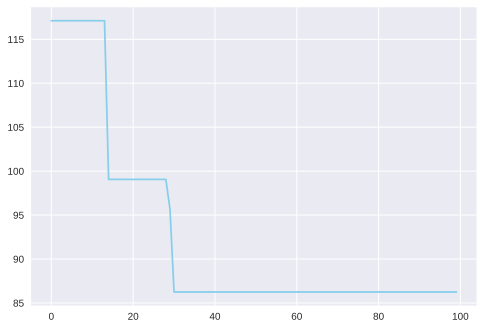

[4, 1, 3, 2, 0]


In [147]:
best, history = genetic_algorithm(
    songs,
    adjacency_mat,
    n_iter=100,
    verbose=False,
    print_interval=20,
    return_history=True,
)

plt.plot(range(len(history)), history, color="skyblue")
plt.show()
print(best)

In [148]:
def generate_songs(n_songs, factor=10):
    return np.random.rand(n_songs, 2) * n_songs * factor

In [149]:
def make_mat(coordinates):
    res = [
        [get_distance(song1, song2) for song2 in coordinates]
        for song1 in coordinates
    ]
    return np.asarray(res)

def get_distance(song1, song2):
    return np.sqrt((song1[0] - song2[0])**2 + (song1[1] - song2[1])**2)

In [150]:
test_coords = [[0, 0], [0, 1], [1, 1], [1, 0]]

make_mat(test_coords)

array([[0.        , 1.        , 1.41421356, 1.        ],
       [1.        , 0.        , 1.        , 1.41421356],
       [1.41421356, 1.        , 0.        , 1.        ],
       [1.        , 1.41421356, 1.        , 0.        ]])

In [151]:
generate_songs(5)

array([[26.00952616, 22.38014702],
       [27.8910096 ,  8.30171567],
       [30.67365693, 18.15503683],
       [44.85931705,  8.44271033],
       [25.35255519, 29.90563147]])

In [159]:
songs = range(20)
song_coordinates = generate_songs(len(songs))
adjacency_mat = make_mat(song_coordinates)


In [ ]:
####### Include csv values

In [ ]:
import numpy as np
from numpy.random import seed
from numpy.random import rand
%matplotlib inline

import matplotlib.pyplot as plt
from scipy.spatial import distance
import pandas as pd

In [ ]:

df = pd.read_csv('/content/drive/MyDrive/playlist/optimised_predictions1.csv')
df

,Unnamed: 0,Predicted Genre,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
0,All Along the Watchtower,rock,0.0010,0.0002,0.1386,0.1255,0.0014,0.3199,0.0000,0.0231,0.0058,0.3844
1,Love and or Hate Trigger,disco,0.0000,0.0005,0.0000,0.6839,0.3030,0.0000,0.0004,0.0006,0.0115,0.0002
2,Corpse Pose,rock,0.0000,0.0000,0.0083,0.0133,0.0000,0.0007,0.0024,0.0079,0.0000,0.9674
3,Diary of a Rose,country,0.0000,0.0009,0.6169,0.0952,0.0001,0.0002,0.0003,0.1957,0.0828,0.0080
4,Peanuts Grow Underground,disco,0.0003,0.0780,0.4102,0.4851,0.0014,0.0002,0.0000,0.0034,0.0049,0.0166
5,We Are Family,disco,0.0014,0.0020,0.0195,0.5230,0.0015,0.0008,0.0000,0.0132,0.0031,0.4354
6,Circuits,reggae,0.0000,0.0062,0.2957,0.0364,0.0007,0.0006,0.0000,0.2897,0.3447,0.0260
7,Dsco,rock,0.0000,0.0001,0.0610,0.4011,0.0003,0.0002,0.0000,0.0355,0.0004,0.5013
8,LEAVING HELL,rock,0.0002,0.0007,0.2135,0.0949,0.0219,0.0001,0.0001,0.1368,0.2428,0.2889
9,Bullet With a Name,metal,0.0001,0.0001,0.0000,0.0001,0.2422,0.1586,0.4069,0.0183,0.0001,0.1736


In [ ]:
smdf = df.iloc[:10,2:]

In [ ]:

values = smdf.to_numpy()

Generation 0: 1281.096829674566
Generation 100: 557.4916638902714
Generation 200: 557.4916638902714
Generation 300: 557.4916638902714
Generation 400: 557.4916638902714
Generation 500: 557.4916638902714
Generation 600: 554.0947902098353
Generation 700: 554.0947902098353
Generation 800: 554.0947902098353
Generation 900: 554.0947902098353


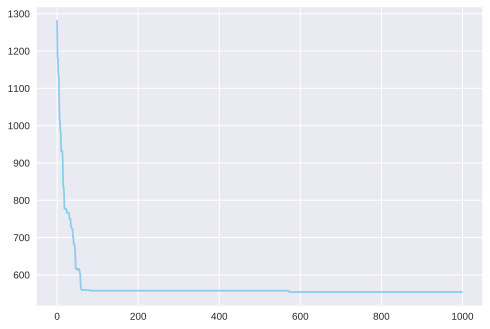

[7, 17, 19, 16, 18, 6, 13, 15, 0, 11, 3, 12, 4, 5, 2, 10, 14, 8, 1, 9]


In [181]:
best, history = genetic_algorithm(
    songs, adjacency_mat, n_population=200, n_iter=1000, verbose=False, return_history=True
)
plt.plot(range(len(history)), history, color="skyblue")
plt.show()
print(best)

In [157]:
def print_path(best, song_coordinates):
    points = song_coordinates[best]
    x, y = zip(*points)
    plt.plot(x, y, color="skyblue", marker="o")

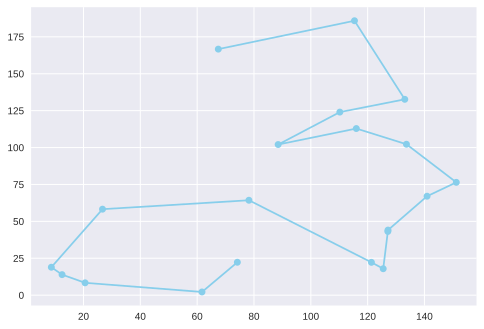

In [182]:
print_path(best, song_coordinates)

In [ ]:
def better_generate_songs(n_songs, factor=0.2):
    x = np.asarray(range(int(-n_songs / 2), int(n_songs / 2) + 1, 1))
    y = np.sqrt(n_songs ** 2 / 4 - x ** 2)
    return np.asarray(list(zip(x, y)))

In [ ]:
songs = range(30)
song_coordinates = better_generate_songs(len(songs))
adjacency_mat = make_mat(song_coordinates)
best, history = genetic_algorithm(
    songs, adjacency_mat, n_population=500, selectivity=0.05,
    p_mut=0.05, p_cross=0.7, n_iter=4000, print_interval=500, verbose=True, return_history=True
)
plt.plot(range(len(history)), history, color="skyblue")
plt.show()
print(best)

In [ ]:
print_path(best, song_coordinates)